<a href="https://colab.research.google.com/github/shrutigosain/2024Fall_projects/blob/main/PR_Final_Project_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# User Attributes

In [2]:
class User:
    '''
    Represents a user with personal details required for calculating weight loss.

    Attributes:
        age (int): Age of the user in years.
        height (float): Height of the user in cm.
        weight (float): Weight of the user in kg.
        calorie_intake (float): Daily caloric intake of the user in kcal.
        gender (str): Gender of the user ('male' or 'female').

        >>> user = User(25, 175, 70, 2000, 'male')
        >>> user.age
        25
        >>> user.height
        175
        >>> user.weight
        70
        >>> user.calorie_intake
        2000
        >>> user.gender
        'male'
     '''

    def __init__(self, age, height, weight, calorie_intake, gender):
        self.age = age
        self.height = height
        self.weight = weight
        self.calorie_intake = calorie_intake
        self.gender = gender.lower()

# Activity Type and Intensity

In [3]:
class Activity:
    '''
    Represents a collection of physical activities and workouts with their MET values and durations.

    Attributes:
        activities (dict): Dictionary storing activity descriptions, MET values, and durations.
        total_duration_minutes (int): Total duration of all added activities in minutes.
    '''

    def __init__(self):
        self.activities = {}  # Dictionary to store activities and their durations
        self.total_duration_minutes = 0  # To keep track of the total duration of all activities


    def prompt_duration(self):
        '''
        Prompts the user to input the duration of an activity in hours and minutes.
        Ensures the entered duration is positive and valid.

        Returns:
            int: The duration of the activity in minutes.
        '''

        while True:
            try:
                # Asking user for input duration
                print(" You will be prompted to enter your workout duration in hours and then minutes..")
                hours = int(input("Enter the duration in hours: "))
                minutes = int(input("Enter the duration in minutes: "))
                if hours < 0 or minutes < 0 or (hours == 0 and minutes == 0):
                    print("Duration must be positive and greater than 0. Please try again.")
                    continue
                duration_minutes = hours * 60 + minutes  # Convert hours to minutes
                return duration_minutes
            except ValueError:
                print("Invalid input. Please enter valid numbers for hours and minutes.")


    def add_activity(self, description, met_value):
        '''
        Adds an activity to the list after validating the total duration.

        Args:
            description (str): Description of the activity.
            met_value (float): MET value associated with the activity.

        Returns:
            bool: True if the activity is successfully added, False otherwise.
        '''

        duration_minutes = self.prompt_duration()
        if self.total_duration_minutes + duration_minutes > 180:

            # Prevents adding activities if total duration exceeds 3 hours
            print(
                "Error: Total duration of activities exceeds 3 hours. Please re-enter the activity and duration."
            )
            return False
        self.total_duration_minutes += duration_minutes

        # Stores activity description and duration in the dictionary
        self.activities[description] = {
            "met_value": met_value,
            "duration_minutes": duration_minutes
        }
        return True


    def select_bicycle(self):
        '''
        Allows the user to select and add a bicycling activity.
        '''
        print("Select a Bicycle Activity Description:")

        # Values from reference paper
        activities = {
            1: (6.8, "Bicycling, stationary, general"),
            2: (3.5, "Bicycling, stationary, 25-30 watts, very light to light effort"),
            3: (4.0, "Bicycling, stationary, 50 watts, light effort"),
            4: (5.0, "Bicycling, stationary, 60 watts, light to moderate effort"),
            5: (5.8, "Bicycling, stationary, 70-80 watts"),
            6: (6.0, "Bicycling, stationary, 90-100 watts, moderate to vigorous"),
            7: (6.8, "Bicycling, stationary, 101-125 watts"),
            8: (8.0, "Bicycling, stationary, 126-150 watts"),
            9: (10.3, "Bicycling, stationary, 151-199 watts"),
            10: (10.8, "Bicycling, stationary, 200-229 watts, vigorous"),
            11: (12.5, "Bicycling, stationary, 230-250 watts, very vigorous"),
            12: (13.8, "Bicycling, stationary, 270-305 watts, very vigorous"),
            13: (16.3, "Bicycling, stationary, >325 watts, very vigorous"),
            14: (9.0, "Bicycling, stationary, RPM/Spin bike class"),
            15: (8.8, "Bicycling, interactive virtual cycling, indoor cycle ergometer"),
            16: (8.8, "Bicycling, high intensity interval training"),
        }

        for key, value in activities.items():
            print(f"{key}. {value[1]}")
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in activities:
            return self.add_activity(activities[choice][1], activities[choice][0])
        else:
            print("Invalid choice.")
            return False


    def select_conditioning_exercise(self):
        '''
        Allows the user to select and add a conditioning exercise.
        '''
        print("Select a Conditioning Exercise Description:")

        # Values from reference paper
        activities = {
            1: (7.5, "Calisthenics (e.g., pushups, sit ups, pull-ups, jumping jacks, burpees, battling ropes), vigorous effort"),
            2: (3.8, "Calisthenics (e.g., pushups, sit ups, pull-ups, lunges), moderate effort"),
            3: (2.8, "Calisthenics (e.g., curl ups, abdominal crunches, plank), light effort"),
            4: (3.5, "Calisthenics, light or moderate effort, general (e.g., back exercises), going up & down from floor (Taylor Code 150)"),
            5: (6.0, "Circuit training, body weight exercises"),
            6: (3.5, "Circuit training, light effort"),
            7: (5.0, "Circuit training, moderate effort"),
            8: (7.5, "Circuit training, including kettlebells, some aerobic movement with minimal rest, general, vigorous intensity"),
            9: (5.0, "Elliptical trainer, moderate effort"),
            10: (9.0, "Elliptical trainer, vigorous effort"),
            11: (6.0, "Resistance (weight lifting – free weight, nautilus or universal-type), power lifting or body building, vigorous effort (Taylor Code 210)"),
            12: (5.0, "Resistance (weight) training, squats, deadlift, slow or explosive effort"),
            13: (3.5, "Resistance (weight) training, multiple exercises, 8-15 reps at varied resistance"),
            14: (5.8, "Resistance Training, circuit, reciprocal supersets, peripheral heart action training"),
            15: (3.0, "Body weight resistance exercises (e.g., squat, lunge, push-up, crunch), general"),
            16: (6.5, "Body weight resistance exercises (e.g., squat, lunge, push-up, crunch), high intensity"),
            17: (9.8, "Kettle bell swings"),
            18: (9.0, "Jumping rope, Digi-Jump Machine, 120 jumps/minute"),
            19: (7.3, "Rowing, stationary ergometer, general, vigorous effort"),
            20: (5.0, "Rowing, stationary ergometer, general, <100 watts, moderate effort"),
            21: (7.5, "Rowing, stationary, 100 to 149 watts, vigorous effort"),
            22: (11.0, "Rowing, stationary, 150 to 199 watts, vigorous effort"),
            23: (14.0, "Rowing, stationary, ≥ 200 watts, very vigorous effort"),
            24: (2.3, "Stretching, mild"),
            25: (1.8, "Pilates, traditional, mat"),
            26: (2.8, "Pilates, general"),
            27: (2.3, "Yoga, Hatha"),
            28: (8.0, "Yoga, high intensity"),
            29: (2.3, "Yoga, General"),
            30: (6.5, "Zumba, group class")
        }

        for key, value in activities.items():
            print(f"{key}. {value[1]}")
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in activities:
            return self.add_activity(activities[choice][1], activities[choice][0])
        else:
            print("Invalid choice.")
            return False


    def select_running(self):
        '''
        Allows the user to select and add a running activity.
        '''

        print("Select a Running Activity Description:")

        # Values from reference paper
        activities = {
            1: (6.0, "Jog/walk combination (jogging component of less than 10 minutes) (Taylor Code 180)"),
            2: (7.5, "Jogging, general, self-selected pace"),
            3: (4.8, "Jogging, in place"),
            4: (3.3, "Jogging 2.6 to 3.7 mph"),
            5: (4.5, "Jogging on a mini-tramp"),
            6: (6.5, "Running, 4 to 4.2 mph (13 min/mile)"),
            7: (7.8, "Running 4.3 to 4.8 mph"),
            8: (8.5, "Running, 5.0 to 5.2 mph (12 min/mile)"),
            9: (9.0, "Running, 5.5 -5.8 mph"),
            10: (9.3, "Running, 6-6.3 mph (10 min/mile)"),
            11: (10.5, "Running, 6.7 mph (9 min/mile)"),
            12: (11.0, "Running, 7 mph (8.5 min/mile)"),
            13: (11.8, "Running, 7.5 mph (8 min/mile)"),
            14: (12.0, "Running, 8 mph (7.5 min/mile)"),
            15: (12.5, "Running, 8.6 mph (7 min/mile)"),
            16: (13.0, "Running, 9 mph (6.5 min/mile)"),
            17: (14.8, "Running, 9.3 to 9.6 mph"),
            18: (14.8, "Running, 10 mph (6 min/mile)"),
            19: (16.8, "Running, 11 mph (5.5 min/mile)"),
            20: (18.5, "Running, 12 mph (5.0 min/mile)"),
            21: (19.8, "Running, 13 mph (4.6 min/mile)"),
            22: (23.0, "Running, 14 mph (4.3 min/mile)")
        }
        for key, value in activities.items():
            print(f"{key}. {value[1]}")
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in activities:
            return self.add_activity(activities[choice][1], activities[choice][0])
        else:
            print("Invalid choice.")
            return False


    def start(self):
        '''
        Starts the activity selection process. Allows the user to add multiple activities, ensuring the total duration does not exceed 3 hours.
        '''

        print(
            "Please select the type of activities performed and enter the duration."
        )
        print("Note: Overtraining is not healthy. Duration of all activities should be less than 3 hours.")

        # Selection of the main "TYPE OF ACTIVITY"
        while True:
            print("\nSelect an Activity Type:")
            print("1. Bicycle")
            print("2. Conditioning Exercise")
            print("3. Running")
            activity_type = int(input("Enter the number corresponding to your choice: "))

            if activity_type == 1:
                if not self.select_bicycle():
                    continue
            elif activity_type == 2:
                if not self.select_conditioning_exercise():
                    continue
            elif activity_type == 3:
                if not self.select_running():
                    continue
            else:
                print("Invalid activity type.")
                continue

            print("Activity added successfully!")
            print(f"Total duration so far: {self.total_duration_minutes // 60} hours and {self.total_duration_minutes % 60} minutes.")
            more = input("Do you want to add more activities? (Y to continue, N to exit): ").strip().upper()
            if more == 'N':
                break

        print("\n Summary of Activities:")
        for description, details in self.activities.items():
            print(f"Activity: {description}, MET Value: {details['met_value']}, Duration: {details['duration_minutes'] // 60} hours and {details['duration_minutes'] % 60} minutes")
        print(f"Total duration of all activities: {self.total_duration_minutes // 60} hours and {self.total_duration_minutes % 60} minutes.")

# Calculations

In [4]:
    def calculate_calories_burned(user, activity_manager):
        '''
        Calculate the total calories burned during all logged activities.

        Args:
            user (User): The user object containing user details like weight.
            activity_manager (Activity): The activity manager object containing logged activities.

        Returns:
            float: Total calories burned from all activities.

            >>> user = User(30, 175, 75, 2000, 'male')
            >>> activity_manager = Activity()
            >>> activity_manager.activities = {
            "Running": {"met_value": 7.5, "duration_minutes": 30},
            "Cycling": {"met_value": 6.8, "duration_minutes": 45}
            }
            >>> calculate_calories_burned(user, activity_manager, 300)
            956.625
        '''

        # Calculate workout calories using MET values, duration (in hours), and user's weight
        workout_calories = sum(
            activity["met_value"] * (activity["duration_minutes"] / 60) * user.weight
            for activity in activity_manager.activities.values()
        )
        return workout_calories


    def calculate_daily_rmr_change(weight, user):
        '''
        Calculate the Resting Metabolic Rate (RMR) based on the user's weight, height, age, and gender.

        Args:
            user (User): The user object containing details like weight, height, age, and gender.

        Returns:
            float: The calculated RMR in kcal/day.

        >>> user = User(30, 175, 75, 2000, 'male')
        >>> calculate_daily_rmr_change(75, user)
        1684.7750000000003

        '''

        if user.gender == "male":
            # RMR formula for males
            rmr = (10 * 0.453592 * weight) + (6.25 * 2.54 * user.height) - (5 * user.age) + 5
        elif user.gender == "female":
            # RMR formula for females
            rmr = (10 * 0.453592 * weight) + (6.25 * 2.54 * user.height) - (5 * user.age) - 161
        else:
            # Error for invalid gender input
            raise ValueError("Invalid gender. Please enter 'male' or 'female'.")
        return rmr




# Simulation

In [5]:
def monte_carlo_simulation(user, activity_manager, additional_calories, weeks=12, num_simulations=1000):

    '''
    Perform a Monte Carlo simulation to predict weight changes over time based on user data and activities.

    Args:
        user (User): The user object containing user details such as weight, calorie intake, etc.
        activity_manager (Activity): The activity manager object containing logged activities and their details.
        additional_calories (float): Base additional calories burned from non-workout activities.
        weeks (int): Number of weeks for the simulation (default is 12 weeks).
        num_simulations (int): Number of Monte Carlo iterations to run (default is 1000).

    Returns:
        np.ndarray: A 2D NumPy array where each row represents weight over time for one simulation.
    '''

    weights_over_time = []
    simulation_duration = weeks * 7  # Duration in days for the number of weeks
    initial_weight = user.weight  # User's initial weight

    for iteration in range(num_simulations):  # Looping for each simulation
        weight = initial_weight
        daily_weights = [weight]

        for day in range(simulation_duration):  # Simulating for each day

            # Randomizing workout days per week
            workout_days = np.random.randint(2, 7)  # Assuming between 2 and 7 workout days per week
            additional_calories = np.random.randint(200, 700)  # Randomizing additional calories burnt
            is_workout_day = random.random() < (workout_days / 7)  # Probability of working out today

            # Calculating daily workout calories burnt
            workout_calories = 0
            if is_workout_day:
                workout_calories = calculate_calories_burned(user, activity_manager)

            rmr = calculate_daily_rmr_change(daily_weights[day], user)  # Adjusting RMR based on current weight

            total_calories_burned = rmr + workout_calories + additional_calories

            calorie_deficit = total_calories_burned - user.calorie_intake

            # Converting calorie deficit to weight change
            weight -= calorie_deficit / 3500  # 1 lb per 3500 calories
            daily_weights.append(weight)

        weights_over_time.append(daily_weights)

    # Converting to Numpy Array
    weights_over_time = np.array(weights_over_time)
    return weights_over_time, simulation_duration


# Visualization

In [6]:
def visualize_simulation(weights_over_time, simulation_duration,num_simulations):
  '''
    Visualizes the results of the Monte Carlo weight loss simulation.

    Args:
        weights_over_time (np.ndarray): A 2D array where each row represents weight trajectory for one simulation.
        simulation_duration (int): Total duration of the simulation in days.
        num_iterations (int): Number of Monte Carlo iterations.

    Returns:
        None
  '''

  # Plot
  plt.figure(figsize=(12, 6))
  for i in range(num_simulations):
      plt.plot(range(simulation_duration + 1), weights_over_time[i], alpha=0.05, color='blue')

  plt.title("Monte Carlo Simulation of Weight Loss Over 12 Weeks")
  plt.xlabel("Days")
  plt.ylabel("Weight (kg)")
  plt.grid(True)
  plt.show()


In [7]:
# def main():

#     # User inputs
#     age = int(input("Enter your age (years): "))
#     height = int(input("Enter your height (inches): "))
#     weight = int(input("Enter your weight (lbs): "))
#     calorie_intake = int(input("Enter your daily calorie intake: "))
#     gender = input("Enter your gender (male/female): ").strip().lower()

#     user = User(age, height, weight, calorie_intake, gender)
#     activity_manager = Activity()
#     activity_manager.start()

#     weights_over_time, simulation_duration = monte_carlo_simulation(user, activity_manager, additional_calories = 0 , weeks=12, num_simulations=1000)
#     visualize_simulation(weights_over_time, simulation_duration,num_simulations=1000 )

#     # print(f"Workout Calories Burned (Daily): {workout_calories:.2f} calories")
#     # print(f"Total Calories Burned (Daily): {total_calories_burned:.2f} calories")
#     # print(f"Weekly Total Calories Burned: {weekly_total_calories_burned:.2f} calories")

# if __name__ == "__main__":
#     main()

we will randomize calories intake - ramge taken from user
days workout and daiy activity level
workout duration, type - fixed
Age -


# Conclusion

The simulation confirms that predicted weight loss over a fixed duration increases with the number of workout days and higher daily activity levels. This is evident because both parameters directly influence the total calories burned, leading to larger caloric deficits.

The incorporation of MET values for activities and randomized daily activity levels captures the dynamic relationship between workout intensity, frequency, and weight loss.

The Monte Carlo simulation highlights that weight loss is linear.

The hypothesis is partially validated:
Predicted weight loss indeed increases with more workout days and higher daily activity levels.
Higher initial weight leads to greater variability in predicted weight loss due to the scaling effects of RMR and activity-related calorie expenditure.
The code effectively captures these dynamics by incorporating individualized inputs (e.g., weight, RMR) and stochastic elements (e.g., randomized workout days and activity levels).


While the simulation provides valuable insights, real-world weight loss outcomes depend on additional physiological and behavioral factors not accounted for in the model. The variability observed in simulations underscores the importance of personalization in weight loss strategies.

# Hypothesis 2



In [8]:
##Updating the RMR calculation based on Sleep Duartion (Randomly chosen between 3 and 10)

In [9]:

def calculate_daily_rmr_change_updated(base_rmr, sleep_duration):
    """
    Calculate the adjusted RMR based on sleep duration.
    :param base_rmr: Base Resting Metabolic Rate (RMR)
    :param sleep_duration: Optional parameter, if None a random value between 3-10 is assigned.
    :return: Adjusted RMR
    """
    if sleep_duration >= 8:
        adjusted_rmr = base_rmr  # No reduction if the duration is greater than 8 hours
    else:
        reduction_factor = 0.05 * (8 - sleep_duration)  # 5% reduction per hour below 8
        adjusted_rmr = base_rmr * (1 - reduction_factor)

    return adjusted_rmr

In [10]:
def monte_carlo_simulation_updated(user, activity_manager, additional_calories, weeks=12, num_simulations=1000):

    '''
    Perform a Monte Carlo simulation to predict weight changes over time based on user data and activities.

    Args:
        user (User): The user object containing user details such as weight, calorie intake, etc.
        activity_manager (Activity): The activity manager object containing logged activities and their details.
        additional_calories (float): Base additional calories burned from non-workout activities.
        weeks (int): Number of weeks for the simulation (default is 12 weeks).
        num_simulations (int): Number of Monte Carlo iterations to run (default is 1000).

    Returns:
        np.ndarray: A 2D NumPy array where each row represents weight over time for one simulation.
    '''

    weights_over_time = []
    simulation_duration = weeks * 7  # Duration in days for the number of weeks
    initial_weight = user.weight  # User's initial weight

    for iteration in range(num_simulations):  # Looping for each simulation
        weight = initial_weight
        daily_weights = [weight]

        for day in range(simulation_duration):  # Simulating for each day

            # Randomizing workout days per week
            workout_days = np.random.randint(2, 7)  # Assuming between 2 and 7 workout days per week
            additional_calories = np.random.randint(200, 700)  # Randomizing additional calories burnt
            is_workout_day = random.random() < (workout_days / 7)  # Probability of working out today

            # Calculating daily workout calories burnt
            workout_calories = 0
            if is_workout_day:
                workout_calories = calculate_calories_burned(user, activity_manager)

            sleep_duration = np.random.randint(3, 10)

            rmr = calculate_daily_rmr_change(daily_weights[day], user)  # Adjusting RMR based on current weight
            rmr_updated = calculate_daily_rmr_change_updated(rmr, sleep_duration)

            total_calories_burned = rmr_updated + workout_calories + additional_calories

            calorie_intake_range = np.random.randint((user.calorie_intake - user.calorie_intake/2),(user.calorie_intake + user.calorie_intake/2))
            calorie_deficit = total_calories_burned - calorie_intake_range

            # Converting calorie deficit to weight change
            weight -= calorie_deficit / 3500  # 1 lb per 3500 calories
            daily_weights.append(weight)

        weights_over_time.append(daily_weights)

    # Converting to Numpy Array
    weights_over_time = np.array(weights_over_time)
    return weights_over_time, simulation_duration


Enter your age (years): 26
Enter your height (inches): 77
Enter your weight (lbs): 176
Enter your daily calorie intake: 3000
Enter your gender (male/female): male
Please select the type of activities performed and enter the duration.
Note: Overtraining is not healthy. Duration of all activities should be less than 3 hours.

Select an Activity Type:
1. Bicycle
2. Conditioning Exercise
3. Running
Enter the number corresponding to your choice: 2
Select a Conditioning Exercise Description:
1. Calisthenics (e.g., pushups, sit ups, pull-ups, jumping jacks, burpees, battling ropes), vigorous effort
2. Calisthenics (e.g., pushups, sit ups, pull-ups, lunges), moderate effort
3. Calisthenics (e.g., curl ups, abdominal crunches, plank), light effort
4. Calisthenics, light or moderate effort, general (e.g., back exercises), going up & down from floor (Taylor Code 150)
5. Circuit training, body weight exercises
6. Circuit training, light effort
7. Circuit training, moderate effort
8. Circuit traini

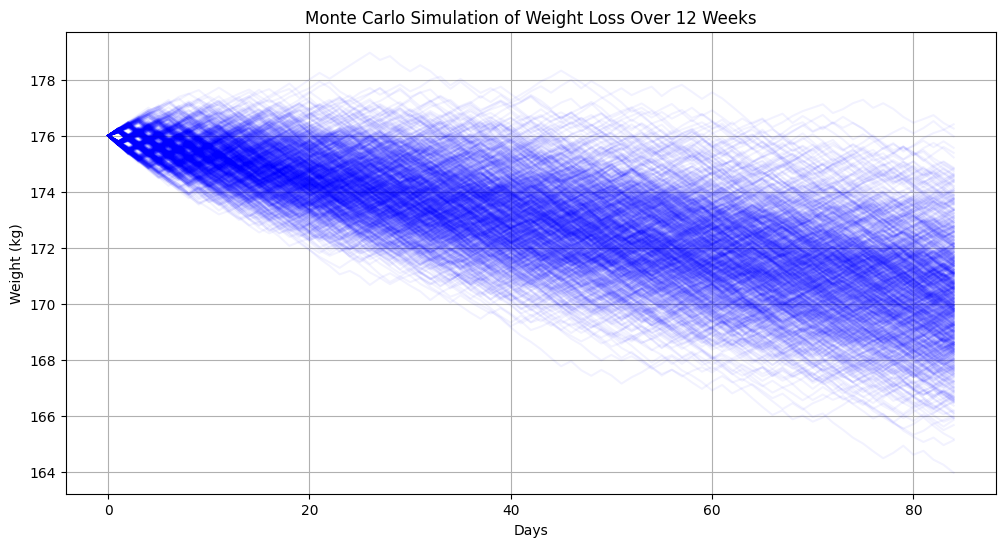

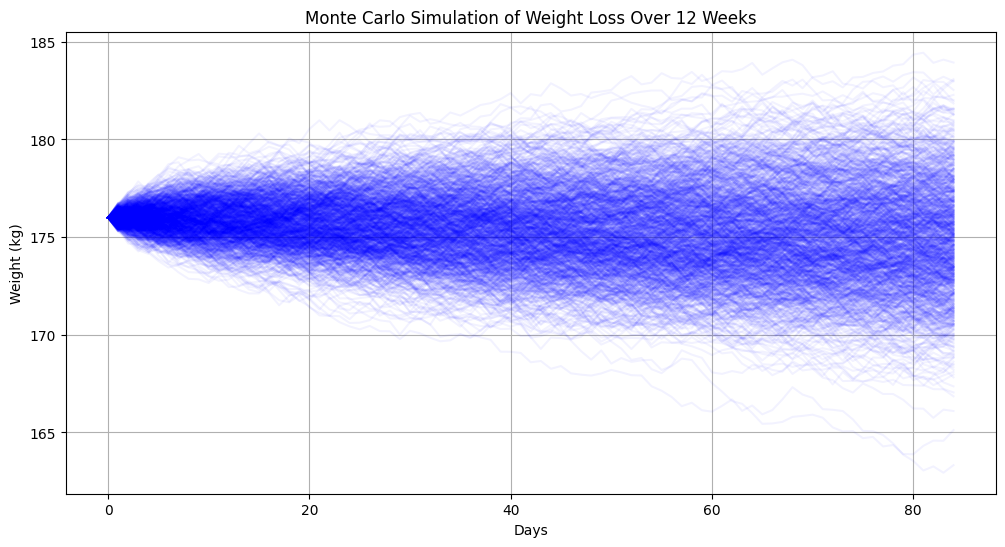

In [11]:
def main():

    # User inputs
    age = int(input("Enter your age (years): "))
    height = int(input("Enter your height (inches): "))
    weight = int(input("Enter your weight (lbs): "))
    calorie_intake = int(input("Enter your daily calorie intake: "))
    gender = input("Enter your gender (male/female): ").strip().lower()

    user = User(age, height, weight, calorie_intake, gender)
    activity_manager = Activity()
    activity_manager.start()

    weights_over_time, simulation_duration = monte_carlo_simulation(user, activity_manager, additional_calories = 0 , weeks=12, num_simulations=1000)
    visualize_simulation(weights_over_time, simulation_duration,num_simulations=1000 )

    weights_over_time_new, simulation_duration_new = monte_carlo_simulation_updated(user, activity_manager, additional_calories = 0 , weeks=12, num_simulations=1000)
    visualize_simulation(weights_over_time_new, simulation_duration_new,num_simulations=1000 )

    # print(f"Workout Calories Burned (Daily): {workout_calories:.2f} calories")
    # print(f"Total Calories Burned (Daily): {total_calories_burned:.2f} calories")
    # print(f"Weekly Total Calories Burned: {weekly_total_calories_burned:.2f} calories")

if __name__ == "__main__":
    main()